# Predict the rift

Imports necesarios

In [1]:
import pandas as pd
import requests
import sklearn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
import seaborn as sns
from matplotlib import pyplot

Api key que se utilizara para hacer las requests necesarias

In [2]:
gameid = "EUW1_5875262791"
api_key = "RGAPI-a8585106-4f99-4026-aa58-278a3c468d06"

Carga de datos y exploración inicial

In [3]:
df = pd.read_pickle("finalinfo.pkl")
df_winners = df[df["BlueWin"] == True]
df_losers = df[df["BlueWin"] == False]

In [4]:
df.head()

temp_names,gd1,gd10,gd11,gd12,gd13,gd14,gd15,gd2,gd3,gd4,...,wd7,wd8,wd9,wd10,wd11,wd12,wd13,wd14,wd15,BlueWin
gameId,,,,,,,,,,,,,,,,,,,,,
EUW1_5763325310,516,16400,23181,30858,39067,49680,61268,1109,1774,3458,...,5,11,12,16,15,24,28,30,36,True
EUW1_5763410685,500,5005,5207,5813,6097,6703,7860,974,1228,1073,...,65,66,70,73,86,91,119,136,145,True
EUW1_5763819470,559,-2886,-4284,-6152,-6830,-8325,-8928,1097,1600,1046,...,19,24,28,30,37,41,48,50,54,True
EUW1_5764707648,0,-5689,-6628,-9264,-12651,-17040,-21966,162,-368,-1060,...,-7,-7,-7,-7,-9,-10,-9,-13,-13,False
EUW1_5765338010,0,8681,10020,11340,12929,14682,16479,-57,416,1796,...,3,7,4,4,1,2,1,0,1,True


In [5]:
df.describe()

temp_names,kd1,kd2,kd3,kd4,kd5,kd6,kd7,kd8,kd9,kd10,...,wd6,wd7,wd8,wd9,wd10,wd11,wd12,wd13,wd14,wd15
count,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.00000,3964.000000,...,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000
mean,0.006559,0.003532,0.023713,0.017659,0.041120,0.053734,0.038093,0.068365,0.04894,0.041120,...,0.389506,0.559031,0.729818,0.784813,0.892533,1.029516,1.118315,1.246973,1.402371,1.399344
std,0.284971,0.580608,1.031643,1.612214,2.044687,2.467736,2.977807,3.432727,3.87694,4.390315,...,9.623687,11.655359,13.962601,15.977996,18.226310,20.581672,23.009162,25.481966,28.210347,30.564348
min,-2.000000,-4.000000,-6.000000,-7.000000,-9.000000,-11.000000,-11.000000,-15.000000,-15.00000,-18.000000,...,-110.000000,-147.000000,-153.000000,-196.000000,-213.000000,-243.000000,-275.000000,-293.000000,-320.000000,-374.000000
25%,0.000000,0.000000,0.000000,-1.000000,-1.000000,-2.000000,-2.000000,-2.000000,-3.00000,-3.000000,...,-2.000000,-2.000000,-3.000000,-3.000000,-4.000000,-4.000000,-5.000000,-6.000000,-6.000000,-7.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.00000,3.000000,...,2.000000,3.000000,3.000000,4.000000,5.000000,5.000000,6.000000,7.000000,8.000000,9.000000
max,3.000000,4.000000,5.000000,7.000000,7.000000,8.000000,11.000000,12.000000,15.00000,18.000000,...,148.000000,172.000000,219.000000,221.000000,226.000000,249.000000,271.000000,292.000000,341.000000,368.000000


Comprobar si las clases están repartidas equitativamente

In [6]:
print("% rows que son victoria: "+ str((len(df[df["BlueWin"] == True])/len(df)*100)))
print(" ")
print("% rows que son derrota: "+ str((len(df[df["BlueWin"] == False])/len(df)*100)))

% rows que son victoria: 49.59636730575176
 
% rows que son derrota: 50.40363269424824


Exploración visual basica

# Decision Trees

In [7]:
X = df[["kd12","gd12","xpd12","csd12","dd12","hd12","td12","pd12","tdd12","wd12"]]
y = df["BlueWin"]

dt = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y)
dt.fit(X_train, y_train)
y_hat = dt.predict(X_test)

In [8]:
# get importance
importance = dt.feature_importances_

Feature: kd, Score: 0.11685
Feature: gd, Score: 0.30934
Feature: xpd, Score: 0.12785
Feature: csd, Score: 0.10255
Feature: dd, Score: 0.03185
Feature: hd, Score: 0.01403
Feature: td, Score: 0.02136
Feature: pd, Score: 0.06578
Feature: tdd, Score: 0.11131
Feature: wd, Score: 0.09908


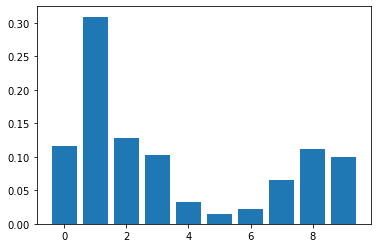

In [9]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: '+X.axes[1][i][:-2]+', Score: %.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [10]:
reportdt = classification_report(y_test, y_hat)
print(reportdt)

              precision    recall  f1-score   support

       False       0.66      0.61      0.63       523
        True       0.60      0.64      0.62       468

    accuracy                           0.63       991
   macro avg       0.63      0.63      0.63       991
weighted avg       0.63      0.63      0.63       991



# Random Forest

In [11]:
X = df[["kd12","gd12","xpd12","csd12","dd12","hd12","td12","pd12","tdd12","wd12"]]
y = df["BlueWin"]

rf = RandomForestClassifier(oob_score=True)

X_train, X_test, y_train, y_test = train_test_split(X, y)
rf.fit(X_train, y_train)

rf.oob_score_

0.7043390514631686

In [12]:
y_hat = rf.predict(X_test)
probs = rf.predict_proba(X_test)

accuracy_score(y_test, y_hat), precision_score(y_test, y_hat), recall_score(y_test, y_hat)

(0.7073662966700303, 0.7012448132780082, 0.6983471074380165)

Feature: kd, Score: 0.11685
Feature: gd, Score: 0.30934
Feature: xpd, Score: 0.12785
Feature: csd, Score: 0.10255
Feature: dd, Score: 0.03185
Feature: hd, Score: 0.01403
Feature: td, Score: 0.02136
Feature: pd, Score: 0.06578
Feature: tdd, Score: 0.11131
Feature: wd, Score: 0.09908


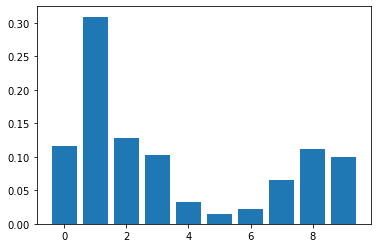

In [13]:
importances =  rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: '+X.axes[1][i][:-2]+', Score: %.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [14]:
reportrf = classification_report(y_test, y_hat)
print(reportrf)

              precision    recall  f1-score   support

       False       0.71      0.72      0.71       507
        True       0.70      0.70      0.70       484

    accuracy                           0.71       991
   macro avg       0.71      0.71      0.71       991
weighted avg       0.71      0.71      0.71       991



# Artificial Neural Networks

In [15]:
X = df[["kd12","gd12","xpd12","csd12","dd12","hd12","td12","pd12","tdd12","wd12"]]
y = df["BlueWin"]

clf = MLPClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf.fit(X_train, y_train)

MLPClassifier()

In [16]:
y_hat = clf.predict(X_test)

In [17]:
reportnn = classification_report(y_test, y_hat)
print(reportnn)

              precision    recall  f1-score   support

       False       0.73      0.66      0.69       526
        True       0.65      0.72      0.69       465

    accuracy                           0.69       991
   macro avg       0.69      0.69      0.69       991
weighted avg       0.69      0.69      0.69       991



# SVM

In [18]:
X = df[["kd12","gd12","xpd12","csd12","dd12","hd12","td12","pd12","tdd12","wd12"]]
y = df["BlueWin"]

In [19]:
svmcl =  svm.SVC()

X_train, X_test, y_train, y_test = train_test_split(X, y)

svmcl.fit(X_train,y_train)

SVC()

In [20]:
y_hat = svmcl.predict(X_test)

In [21]:
reportsvm = classification_report(y_test, y_hat)
print(reportsvm)

              precision    recall  f1-score   support

       False       0.71      0.73      0.72       494
        True       0.72      0.70      0.71       497

    accuracy                           0.71       991
   macro avg       0.71      0.71      0.71       991
weighted avg       0.71      0.71      0.71       991



# Logistic Regression

In [22]:
X = df[["kd12","gd12","xpd12","csd12","dd12","hd12","td12","pd12","tdd12","wd12"]]
y = df["BlueWin"]

In [23]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y)
# define the model
lr = LogisticRegression()
# fit the model
lr.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_hat = lr.predict(X_test)

In [25]:
reportlr = classification_report(y_test, y_hat)
print(reportlr)

              precision    recall  f1-score   support

       False       0.70      0.73      0.72       490
        True       0.73      0.70      0.71       501

    accuracy                           0.72       991
   macro avg       0.72      0.72      0.72       991
weighted avg       0.72      0.72      0.72       991



# Predict the rift (Logistic Regression)

Importancia de las features

Global (minuto 0-15)

In [26]:
y = df["BlueWin"]

lr = LogisticRegression()

for i in range(1,16):
    
    X = df[["kd"+str(i)+"","gd"+str(i)+"","xpd"+str(i)+"","csd"+str(i)+"","dd"+str(i)+"","hd"+str(i)+"","td"+str(i)+"","pd"+str(i)+"","tdd"+str(i)+"","wd"+str(i)+""]]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    lr.fit(X_train, y_train)
    
    if i == 1:
        importance = lr.coef_[0]
    else:
        importance = importance + lr.coef_[0]


/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
fix_importance = importance/15

Feature: kd, Score: 0.12704
Feature: gd, Score: 0.00011
Feature: xpd, Score: 0.00058
Feature: csd, Score: -0.03758
Feature: dd, Score: 0.04031
Feature: hd, Score: -0.00029
Feature: td, Score: 0.00622
Feature: pd, Score: 0.04965
Feature: tdd, Score: -0.00000
Feature: wd, Score: 0.00446


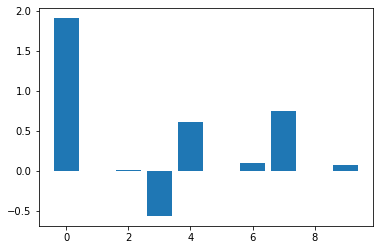

In [28]:
# summarize feature importance
for i,v in enumerate(fix_importance):
    print('Feature: '+X.axes[1][i][:-2]+', Score: %.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Antes del primer dragón (minuto 0-5)

In [29]:
y = df["BlueWin"]

lr = LogisticRegression()

for i in range(1,6):
    
    X = df[["kd"+str(i)+"","gd"+str(i)+"","xpd"+str(i)+"","csd"+str(i)+"","dd"+str(i)+"","hd"+str(i)+"","td"+str(i)+"","pd"+str(i)+"","tdd"+str(i)+"","wd"+str(i)+""]]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    lr.fit(X_train, y_train)
    
    if i == 1:
        importance = lr.coef_[0]
    else:
        importance = importance + lr.coef_[0]


/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
fix_importance = importance/5

Feature: kd, Score: 0.06696
Feature: gd, Score: 0.00045
Feature: xpd, Score: -0.00029
Feature: csd, Score: 0.00038
Feature: dd, Score: 0.00000
Feature: hd, Score: 0.00000
Feature: td, Score: 0.00000
Feature: pd, Score: 0.00462
Feature: tdd, Score: 0.00001
Feature: wd, Score: 0.01276


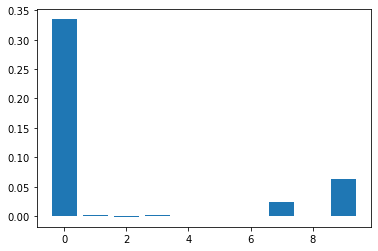

In [31]:
# summarize feature importance
for i,v in enumerate(fix_importance):
    print('Feature: '+X.axes[1][i][:-1]+', Score: %.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Desde el primer dragón (minuto 5-15)

In [32]:
y = df["BlueWin"]

lr = LogisticRegression()

for i in range(5,16):
    
    X = df[["kd"+str(i)+"","gd"+str(i)+"","xpd"+str(i)+"","csd"+str(i)+"","dd"+str(i)+"","hd"+str(i)+"","td"+str(i)+"","pd"+str(i)+"","tdd"+str(i)+"","wd"+str(i)+""]]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    lr.fit(X_train, y_train)
    
    if i == 5:
        importance = lr.coef_[0]
    else:
        importance = importance + lr.coef_[0]


/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
fix_importance = importance/11

Feature: kd, Score: 0.15066
Feature: gd, Score: 0.00004
Feature: xpd, Score: 0.00006
Feature: csd, Score: 0.00011
Feature: dd, Score: 0.06239
Feature: hd, Score: -0.00274
Feature: td, Score: 0.00886
Feature: pd, Score: 0.07531
Feature: tdd, Score: -0.00001
Feature: wd, Score: -0.00108


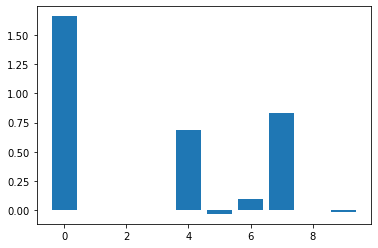

In [34]:
# summarize feature importance
for i,v in enumerate(fix_importance):
    print('Feature: '+X.axes[1][i][:-2]+', Score: %.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Desde el primer heraldo (minuto 8-15)

In [35]:
y = df["BlueWin"]

lr = LogisticRegression()

for i in range(8,16):
    X = df[["kd"+str(i)+"","gd"+str(i)+"","xpd"+str(i)+"","csd"+str(i)+"","dd"+str(i)+"","hd"+str(i)+"","td"+str(i)+"","pd"+str(i)+"","tdd"+str(i)+"","wd"+str(i)+""]]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    lr.fit(X_train, y_train)
    
    if i == 8:
        importance = lr.coef_[0]
    else:
        importance = importance + lr.coef_[0]

/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
fix_importance = importance/8

Feature: kd, Score: 0.15620
Feature: gd, Score: 0.00002
Feature: xpd, Score: 0.00003
Feature: csd, Score: 0.00020
Feature: dd, Score: 0.06907
Feature: hd, Score: -0.00014
Feature: td, Score: 0.01226
Feature: pd, Score: 0.09382
Feature: tdd, Score: -0.00001
Feature: wd, Score: -0.00035


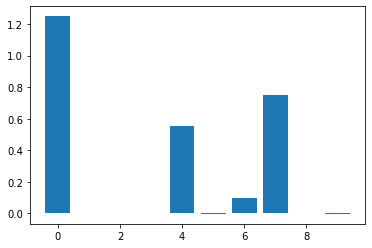

In [37]:
# summarize feature importance
for i,v in enumerate(fix_importance):
    print('Feature: '+X.axes[1][i][:-2]+', Score: %.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

-------------------------------------------------------------------------------------------------------------------------------

Predicting (add data en x_test para después buscarlo)

In [38]:
data = {}
kills = 0;ekills = 0
gold = 0;egold = 0
xp = 0;exp = 0
cs = 0;ecs = 0
drakes = 0;edrakes = 0
heralds = 0;eheralds = 0
towers = 0;etowers = 0
plates = 0;eplates= 0
dmg = 0;edmg = 0
wards = 0;ewards = 0

response = requests.get("https://europe.api.riotgames.com/lol/match/v5/matches/"+gameid+"/timeline?api_key="+api_key+"").json()
        
#First 15min loop                                
for j in range(1,16):

    #Events loop
    for k in range(0,len(response["info"]["frames"][j]["events"])):

        #KillsDiff
        if response["info"]["frames"][j]["events"][k]["type"] == "CHAMPION_KILL":
            if response["info"]["frames"][j]["events"][k]["killerId"] <= 5:
                kills += 1
            else:
                ekills += 1 

        #DrakesDiff & HeraldsDiff
        if response["info"]["frames"][j]["events"][k]["type"] == "ELITE_MONSTER_KILL":
            if response["info"]["frames"][j]["events"][k]["monsterType"] == "DRAGON": 
                if response["info"]["frames"][j]["events"][k]["killerId"] <= 5:
                    drakes += 1
                else:
                    edrakes += 1 

            elif response["info"]["frames"][j]["events"][k]["monsterType"] == "RIFTHERALD":
                if response["info"]["frames"][j]["events"][k]["killerId"] <= 5:
                    heralds += 1
                else:
                    eheralds += 1

        #TowersDiff
        if response["info"]["frames"][j]["events"][k]["type"] == "BUILDING_KILL":
            if response["info"]["frames"][j]["events"][k]["buildingType"] == "TOWER_BUILDING":
                if response["info"]["frames"][j]["events"][k]["teamId"] == 200:
                    towers += 1
                else:
                    etowers += 1

        #PlatesDiff
        if response["info"]["frames"][j]["events"][k]["type"] == "TURRET_PLATE_DESTROYED":
            if response["info"]["frames"][j]["events"][k]["teamId"] == 200:
                plates += 1
            else:
                eplates += 1

        #WardsDiff
        if response["info"]["frames"][j]["events"][k]["type"] == "WARD_PLACED":
            if response["info"]["frames"][j]["events"][k]["creatorId"] <= 5:
                wards += 1
            else:
                ewards += 1


    #Players Loop
    for k in range(1,11):

        #GoldDiff
        if k <= 5:
            gold += response["info"]["frames"][j]["participantFrames"][str(k)]["totalGold"]
        else:
            egold += response["info"]["frames"][j]["participantFrames"][str(k)]["totalGold"]

        #XpDiff
        if k <= 5:
            xp += response["info"]["frames"][j]["participantFrames"][str(k)]["xp"]
        else:
            exp += response["info"]["frames"][j]["participantFrames"][str(k)]["xp"]  

        #CsDiff
        if k <= 5:
            cs += response["info"]["frames"][j]["participantFrames"][str(k)]["minionsKilled"] + response["info"]["frames"][j]["participantFrames"][str(k)]["jungleMinionsKilled"]
        else:
            ecs += response["info"]["frames"][j]["participantFrames"][str(k)]["minionsKilled"] + response["info"]["frames"][j]["participantFrames"][str(k)]["jungleMinionsKilled"]

        #DmgDiff
        if k <= 5:
            dmg += response["info"]["frames"][j]["participantFrames"][str(k)]["damageStats"]["totalDamageDoneToChampions"]
        else:
            edmg += response["info"]["frames"][j]["participantFrames"][str(k)]["damageStats"]["totalDamageDoneToChampions"]


    #Final append to dict
    data["kd"+str(j)+""] = [kills - ekills]
    data["gd"+str(j)+""] = [gold - egold]
    data["xpd"+str(j)+""] = [xp - exp]
    data["csd"+str(j)+""] = [cs - ecs]
    data["dd"+str(j)+""] =[drakes - edrakes]
    data["hd"+str(j)+""] = [heralds - eheralds]
    data["td"+str(j)+""] = [towers - etowers]
    data["pd"+str(j)+""] = [plates - eplates]
    data["tdd"+str(j)+""] = [dmg - edmg]
    data["wd"+str(j)+""] = [wards - ewards]
    
    kills = 0;ekills = 0
    gold = 0;egold = 0
    xp = 0;exp = 0
    cs = 0;ecs = 0
    drakes = 0;edrakes = 0
    heralds = 0;eheralds = 0
    towers = 0;etowers = 0
    plates = 0;eplates= 0
    dmg = 0;edmg = 0
    wards = 0;ewards = 0
    
for k in range(0,len(response["info"]["frames"][len(response["info"]["frames"])-1]["events"])):
        if response["info"]["frames"][len(response["info"]["frames"])-1]["events"][k]["type"] == "GAME_END":
            if response["info"]["frames"][len(response["info"]["frames"])-1]["events"][k]["winningTeam"] == 100:
                data["BlueWin"] = True
            else:
                data["BlueWin"] = False 
    
data["gameId"] = [gameid]

df_temp = pd.DataFrame(data)
df_temp.set_index('gameId') 

,kd1,gd1,xpd1,csd1,dd1,hd1,td1,pd1,tdd1,wd1,...,gd15,xpd15,csd15,dd15,hd15,td15,pd15,tdd15,wd15,BlueWin
gameId,,,,,,,,,,,,,,,,,,,,,
EUW1_5875262791,0,0,0,0,0,0,0,0,0,0,...,2682,2147,66,0,0,0,0,-1548,-6,False


In [39]:
len(X_test)

991

In [40]:
X_test = X_test.append(df_temp)

/tmp/ipykernel_139127/1900750873.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test = X_test.append(df_temp)


In [41]:
i = 5
Xnew = df_temp[["kd"+str(i)+"","gd"+str(i)+"","xpd"+str(i)+"","csd"+str(i)+"","dd"+str(i)+"","hd"+str(i)+"","td"+str(i)+"","pd"+str(i)+"","tdd"+str(i)+"","wd"+str(i)+""]]
# make a prediction
ynew = lr.predict(Xnew)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

In [42]:
lr.predict_proba(Xnew)

array([[0.44109674, 0.55890326]])

Probabilidades

In [44]:
lr.predict_proba(X_test)

ValueError: could not convert string to float: 'EUW1_5875262791'

Accuracy Score

In [ ]:
accuracy_score(y_test, y_hat)

Ratio de predicciones acertadas

In [ ]:
np.mean(y_hat == y_test)

Area under the curve - AUC-ROC curve

In [ ]:
print(roc_auc_score(y_test,y_hat))

Matriz de confusión

In [ ]:
cf = confusion_matrix(y_hat,y_test)
print(cf)

F1_Score

In [ ]:
f1_score(y_test, y_hat)

Accuracy Score

In [ ]:
accuracy_score(y_test, y_hat)

Classification Report

In [ ]:
report = classification_report(y_test, y_hat)
print(report)

Visualización

In [ ]:
sns.heatmap(cf/np.sum(cf), annot=True, fmt='.2%', cmap='Blues')

-----------------------------------------------------------------------------------------------